<br>
<img src="https://sites.google.com/a/chesterqualls.com/chester-qualls-is-it/ChesterQualls%20Logo%28small%29.png?revision=2">
<br>
***
# Diverging Stacked Bar Charts 

> *This Notebook will try to plot likert scale results from Skills Gap research

* The example on https://rpubs.com/tskam/likert looks very promising for our application
* Might be better example, looks like original for above https://xang1234.github.io/likert/
* https://wiki.smu.edu.sg/1920t2isss608/Group04_Report more info on likert analysis
* To cite likert from HH in publications use:

> Heiberger RM, Robbins NB (2014). “Design of Diverging Stacked Bar Charts for Likert Scales and Other Applications.” Journal of Statistical Software, 57(5), 1–32. https://www.jstatsoft.org/v57/i05/.

In [12]:
#Load needed libraries
library(tidyverse)
library(HH)
library(plotly)

#Set working directory
setwd("C:/Users/Chester Qualls/Google Drive/jupyter_nb/Skills Gap")
getwd()

[1] "C:/Users/Chester Qualls/Google Drive/jupyter_nb/Skills Gap"

In [2]:
#load data for plots

mcprofxl <- read.csv("Mid Career Professional Frequency Data.csv",header = TRUE) #Used data created in Excel
datxt <- read.csv("Files from Chris/PHXRawDataText.csv") #This is raw Qualtrix data


In [3]:
# Remove test data not linked to valid distribution
datxt <- datxt %>%
    filter(grp != "") %>%
    filter(grp != 0)

# Dataframe Created in R

In [4]:
#create Entry Level Technical Likert DF from Text
eltech <- select(datxt, Q15_1:Q15_15)
eltech[c(1),] <- gsub(".*? - ", "", eltech[c(1),]) #
names(eltech) <- as.matrix(eltech[1, ])
eltech <- eltech[-1, ]
eltech <- eltech[-c(1),]
#eltech <- sapply(eltech, as.numeric) #don't  need this because it's chr

#begin to pivot
eltech <- gather(eltech, skill,response, c(1:15))%>%
  filter(response != "")
eltech$skill <- as.factor(eltech$skill)
eltech$response <- as.factor(eltech$response)
eltech <- table(eltech$skill,eltech$response) %>% as.data.frame.matrix()
eltech <- select(eltech, "Extremely difficult", "Somewhat difficult", "Neither easy nor difficult", "Somewhat easy", "Extremely easy")
eltech <- tibble::rownames_to_column(eltech, var="Skills") 

eltech

Skills,Extremely difficult,Somewhat difficult,Neither easy nor difficult,Somewhat easy,Extremely easy
<chr>,<int>,<int>,<int>,<int>,<int>
Business continuity / disaster recovery,1,4,2,4,0
Cloud technologies,2,17,6,2,0
Cryptography,1,2,1,0,0
"Cybersecurity/Control frameworks (e.g. COBIT, NIST, etc.)",6,27,10,5,0
"Database (ERD, SQL, noSQL, etc.)",0,4,1,3,0
Hacking acuity/skills,1,4,1,0,0
Incident Response,1,7,7,3,1
Networking / telecom,0,8,1,3,0
"Operarating Systems (Linux, Windows, etc.)",0,2,4,8,2


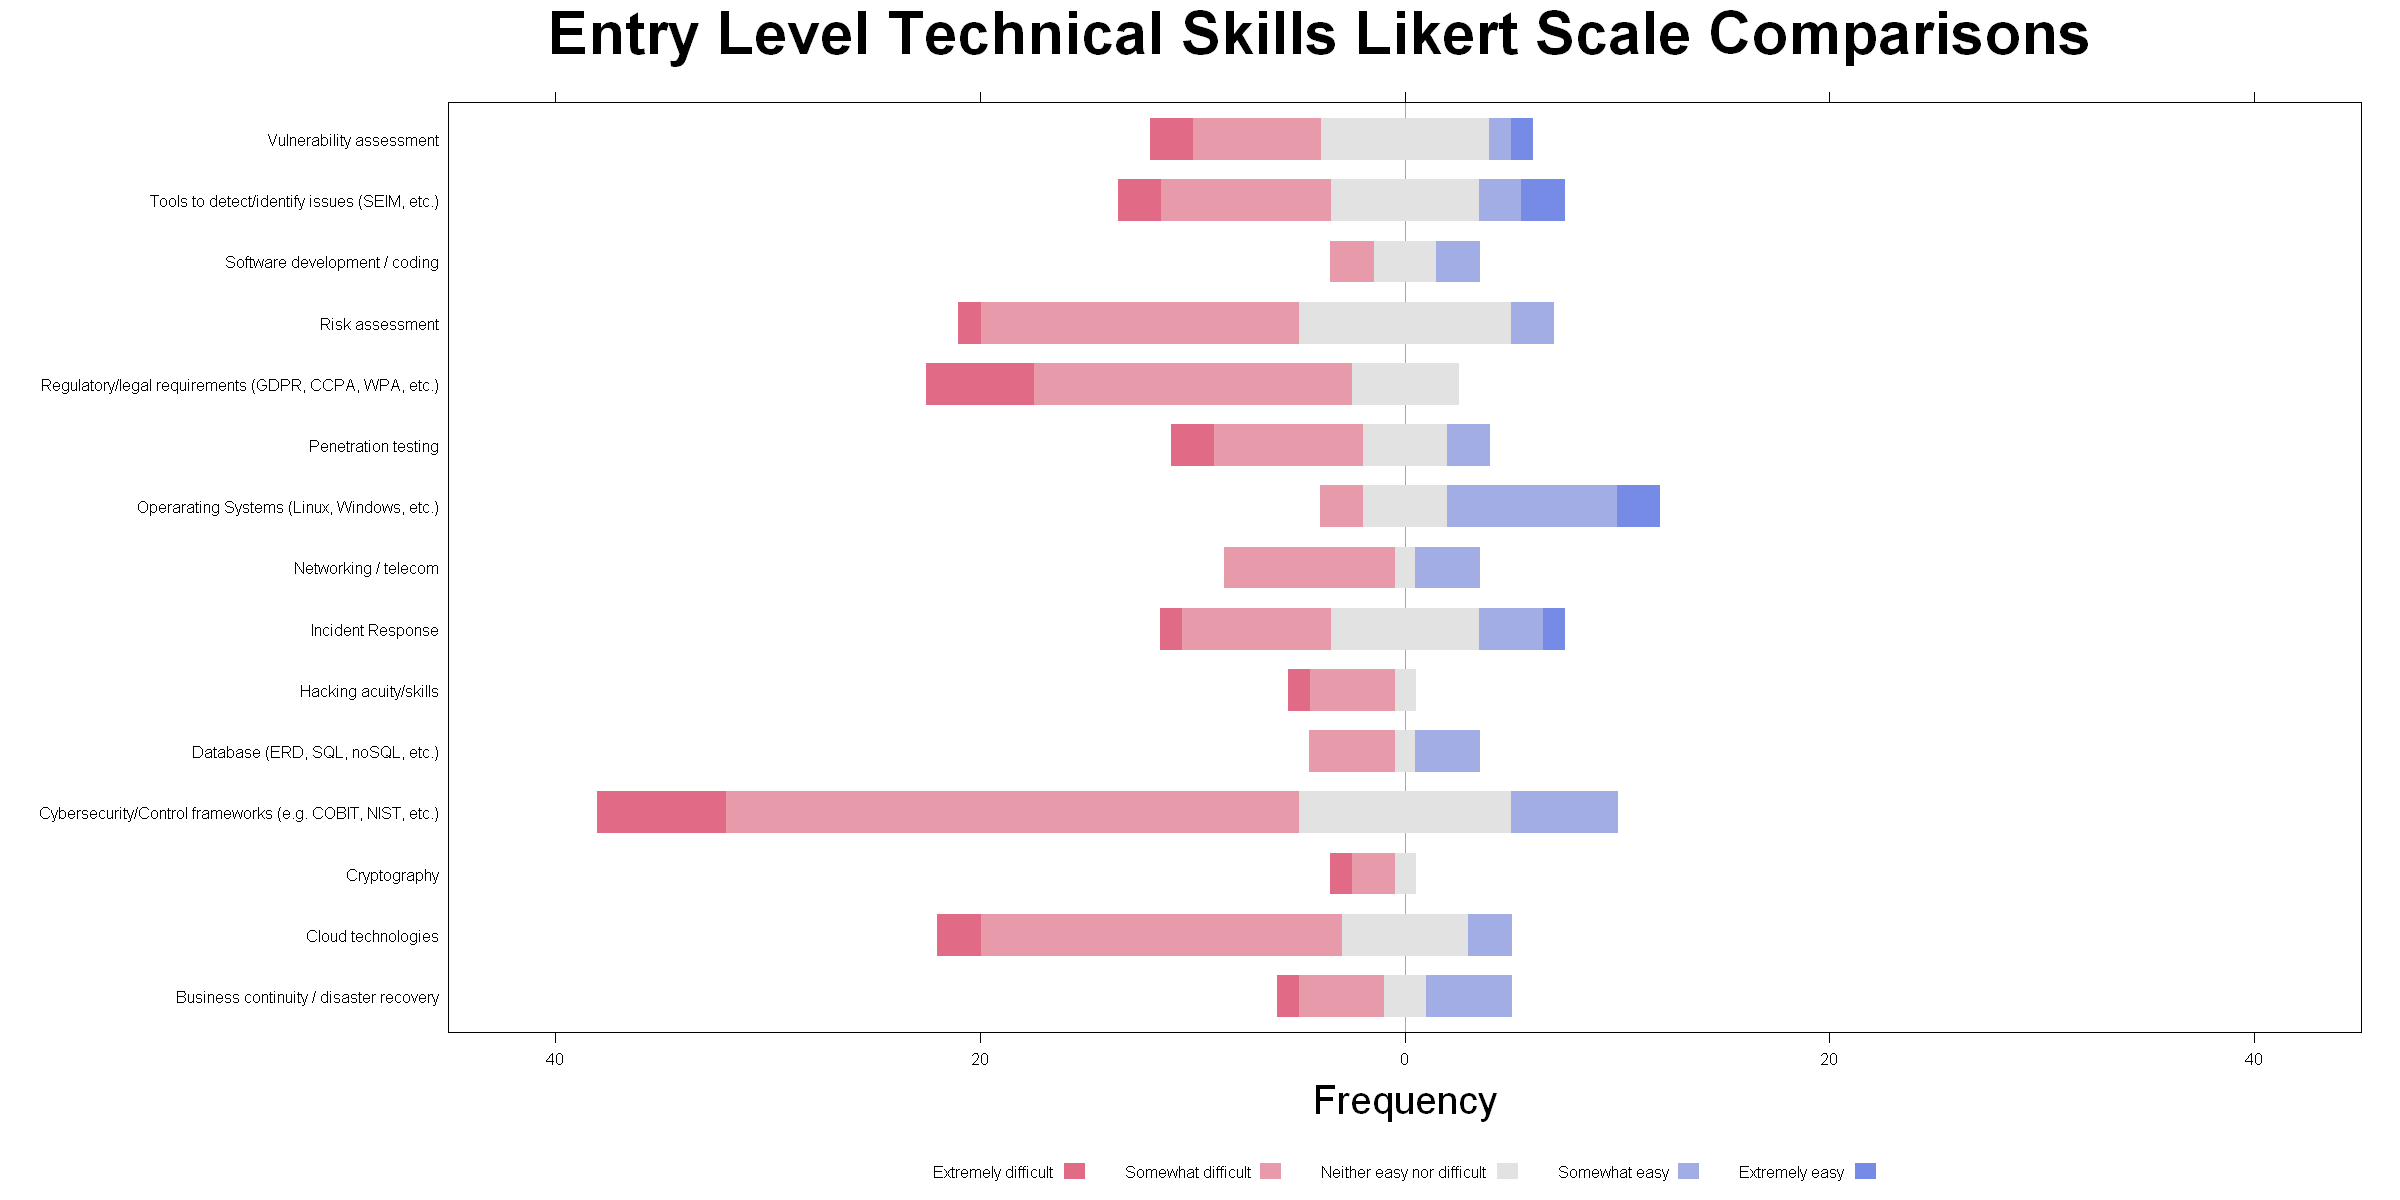

In [45]:
# From table created in R

P <-likert( Skills ~.,data=eltech, ylab=NULL,
       ReferenceZero=3, as.percent=FALSE,
       positive.order=FALSE, data.order=TRUE,
       main = list("Entry Level Technical Skills Likert Scale Comparisons",x=unit(.55, "npc"), cex = 3), 
       #sub= list("Test",x=unit(.55, "npc")), 
       xlab=list("Frequency", cex = 2),
       xlim=c(-45,45),
       strip=FALSE,
       par.strip.text=list(cex=.7))
       options(repr.plot.width=20, repr.plot.height=10)

P

In [6]:
#create Entry Level Professional Likert DF from Text
elpro <- select(datxt, Q16_1:Q16_14)
elpro[c(1),] <- gsub(".*? - ", "", elpro[c(1),]) #
names(elpro) <- as.matrix(elpro[1, ])
elpro <- elpro[-1, ]
elpro <- elpro[-c(1),]
#eltech <- sapply(eltech, as.numeric) #don't  need this because it's chr

#begin to pivot
elpro <- gather(elpro, skill,response, c(1:14))%>%
  filter(response != "")
elpro$skill <- as.factor(elpro$skill)
elpro$response <- as.factor(elpro$response)
elpro <- table(elpro$skill,elpro$response) %>% as.data.frame.matrix()
elpro <- select(elpro, "Extremely difficult", "Somewhat difficult", "Neither easy nor difficult", "Somewhat easy", "Extremely easy")
elpro <- tibble::rownames_to_column(elpro, var="Skills") 

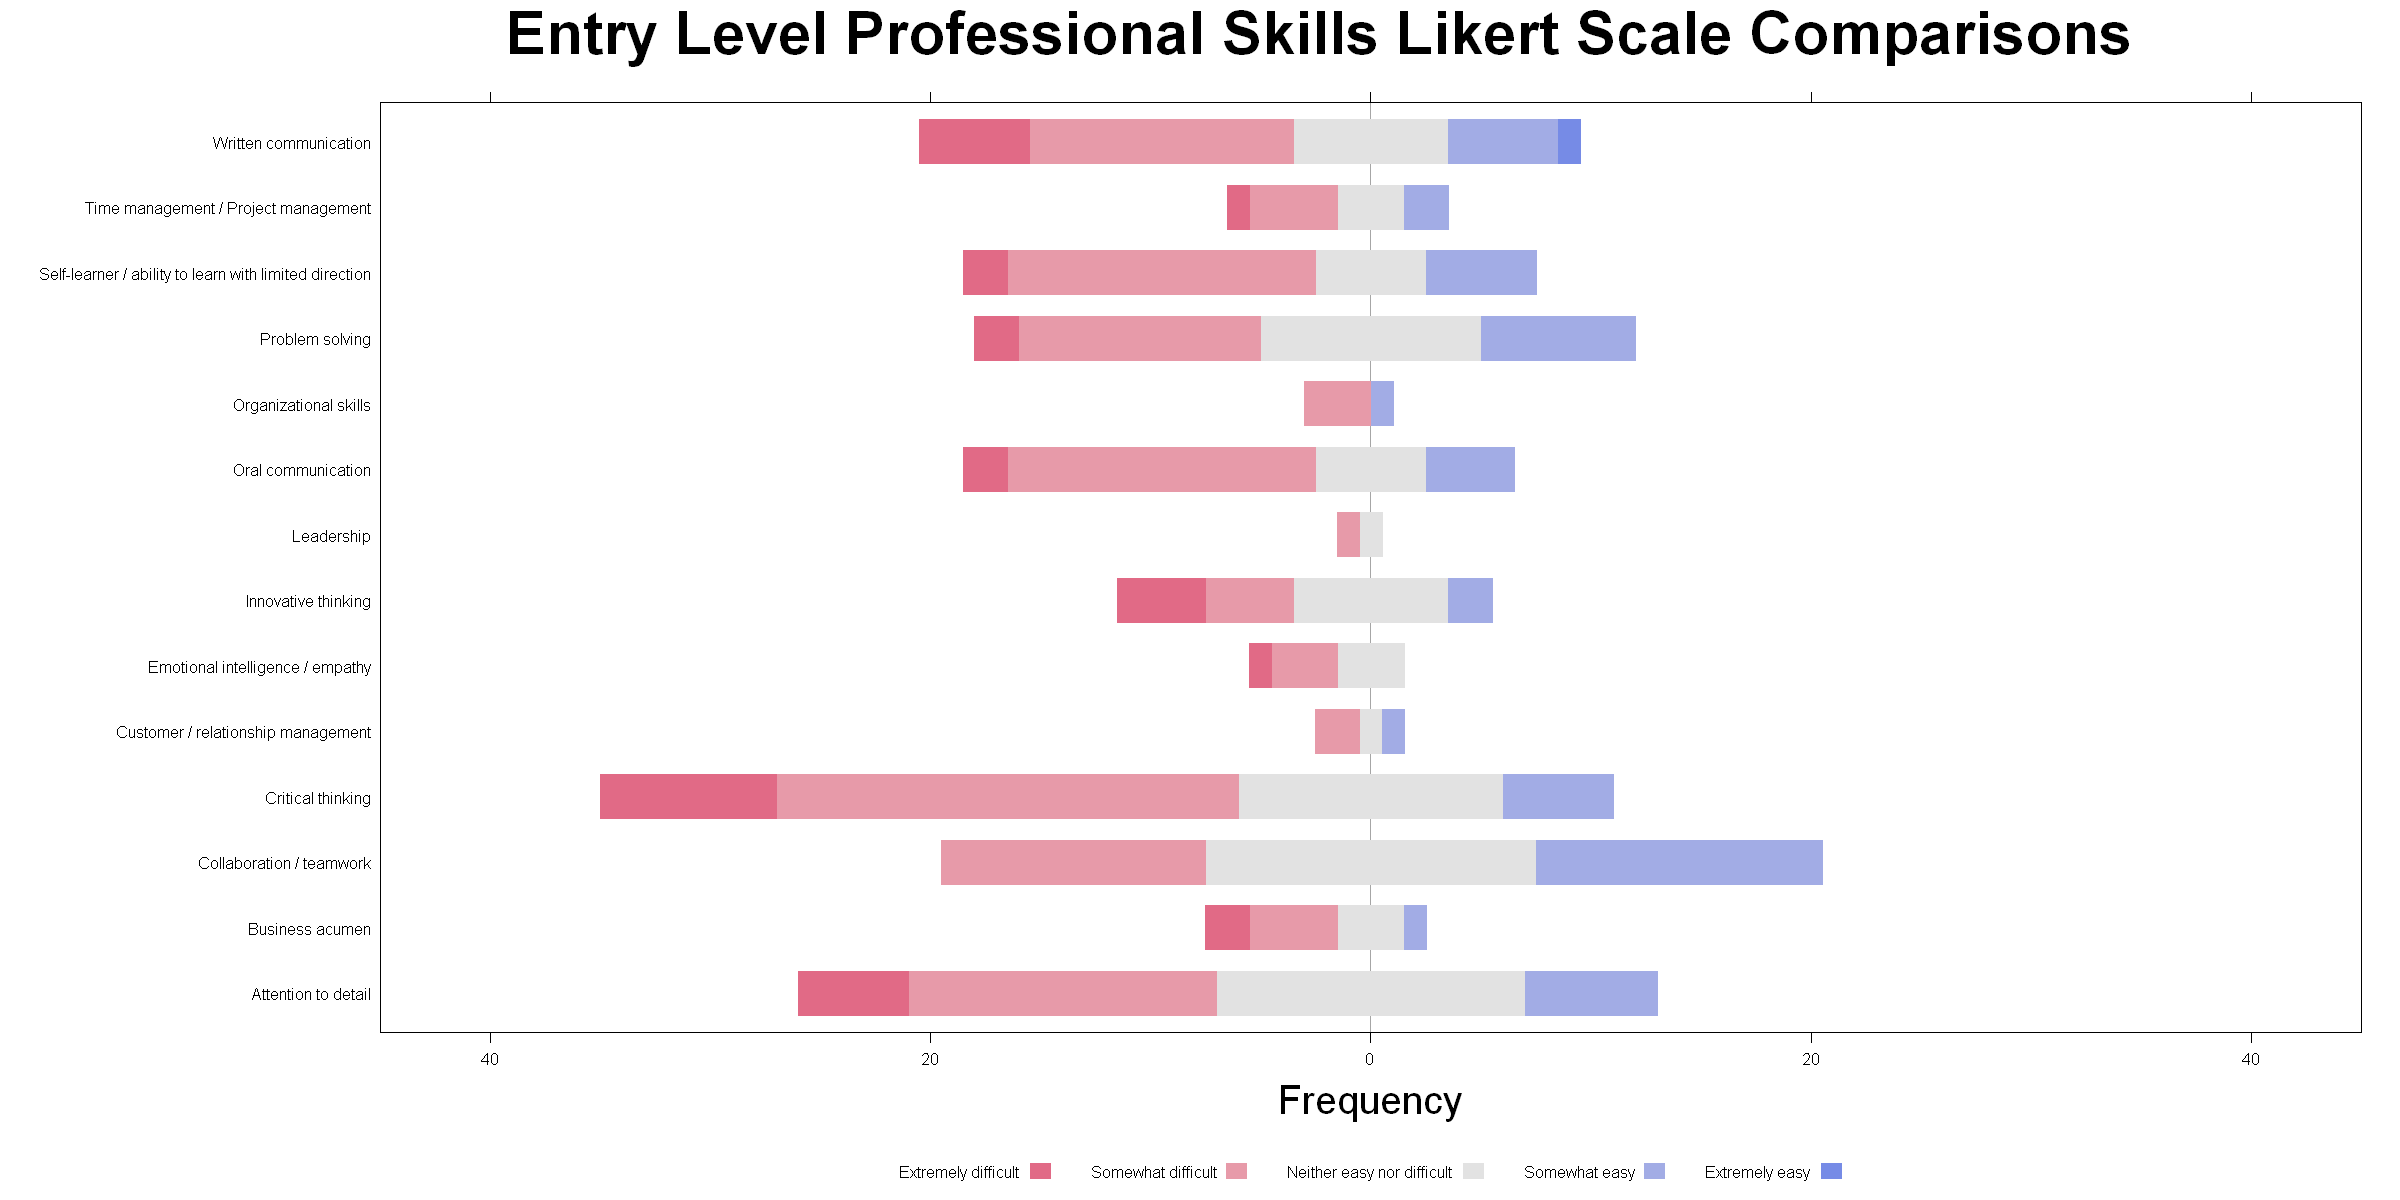

In [46]:
# From table created in R

P <-likert( Skills ~.,data=elpro, ylab=NULL,
       ReferenceZero=3, as.percent=FALSE,
       positive.order=FALSE, data.order=TRUE,
       main = list("Entry Level Professional Skills Likert Scale Comparisons",x=unit(.55, "npc"), cex = 3), 
       #sub= list("Test",x=unit(.55, "npc")), 
       xlab=list("Frequency", cex = 2),
       xlim=c(-45,45),
       strip=FALSE, 
       par.strip.text=list(cex=.7))
       options(repr.plot.width=20, repr.plot.height=10)

P

In [8]:
#create Mid Career Technical Likert DF from Text
mctech <- select(datxt, Q26_1:Q26_15)
mctech[c(1),] <- gsub(".*? - ", "", mctech[c(1),]) #
names(mctech) <- as.matrix(mctech[1, ])
mctech <- mctech[-1, ]
mctech <- mctech[-c(1),]
#eltech <- sapply(eltech, as.numeric) #don't  need this because it's chr

#begin to pivot
mctech <- gather(mctech, skill,response, c(1:15))%>%
  filter(response != "")
mctech$skill <- as.factor(mctech$skill)
mctech$response <- as.factor(mctech$response)
mctech <- table(mctech$skill,mctech$response) %>% as.data.frame.matrix()
mctech <- select(mctech, "Extremely difficult", "Somewhat difficult", "Neither easy nor difficult", "Somewhat easy", "Extremely easy")
mctech <- tibble::rownames_to_column(mctech, var="Skills") 

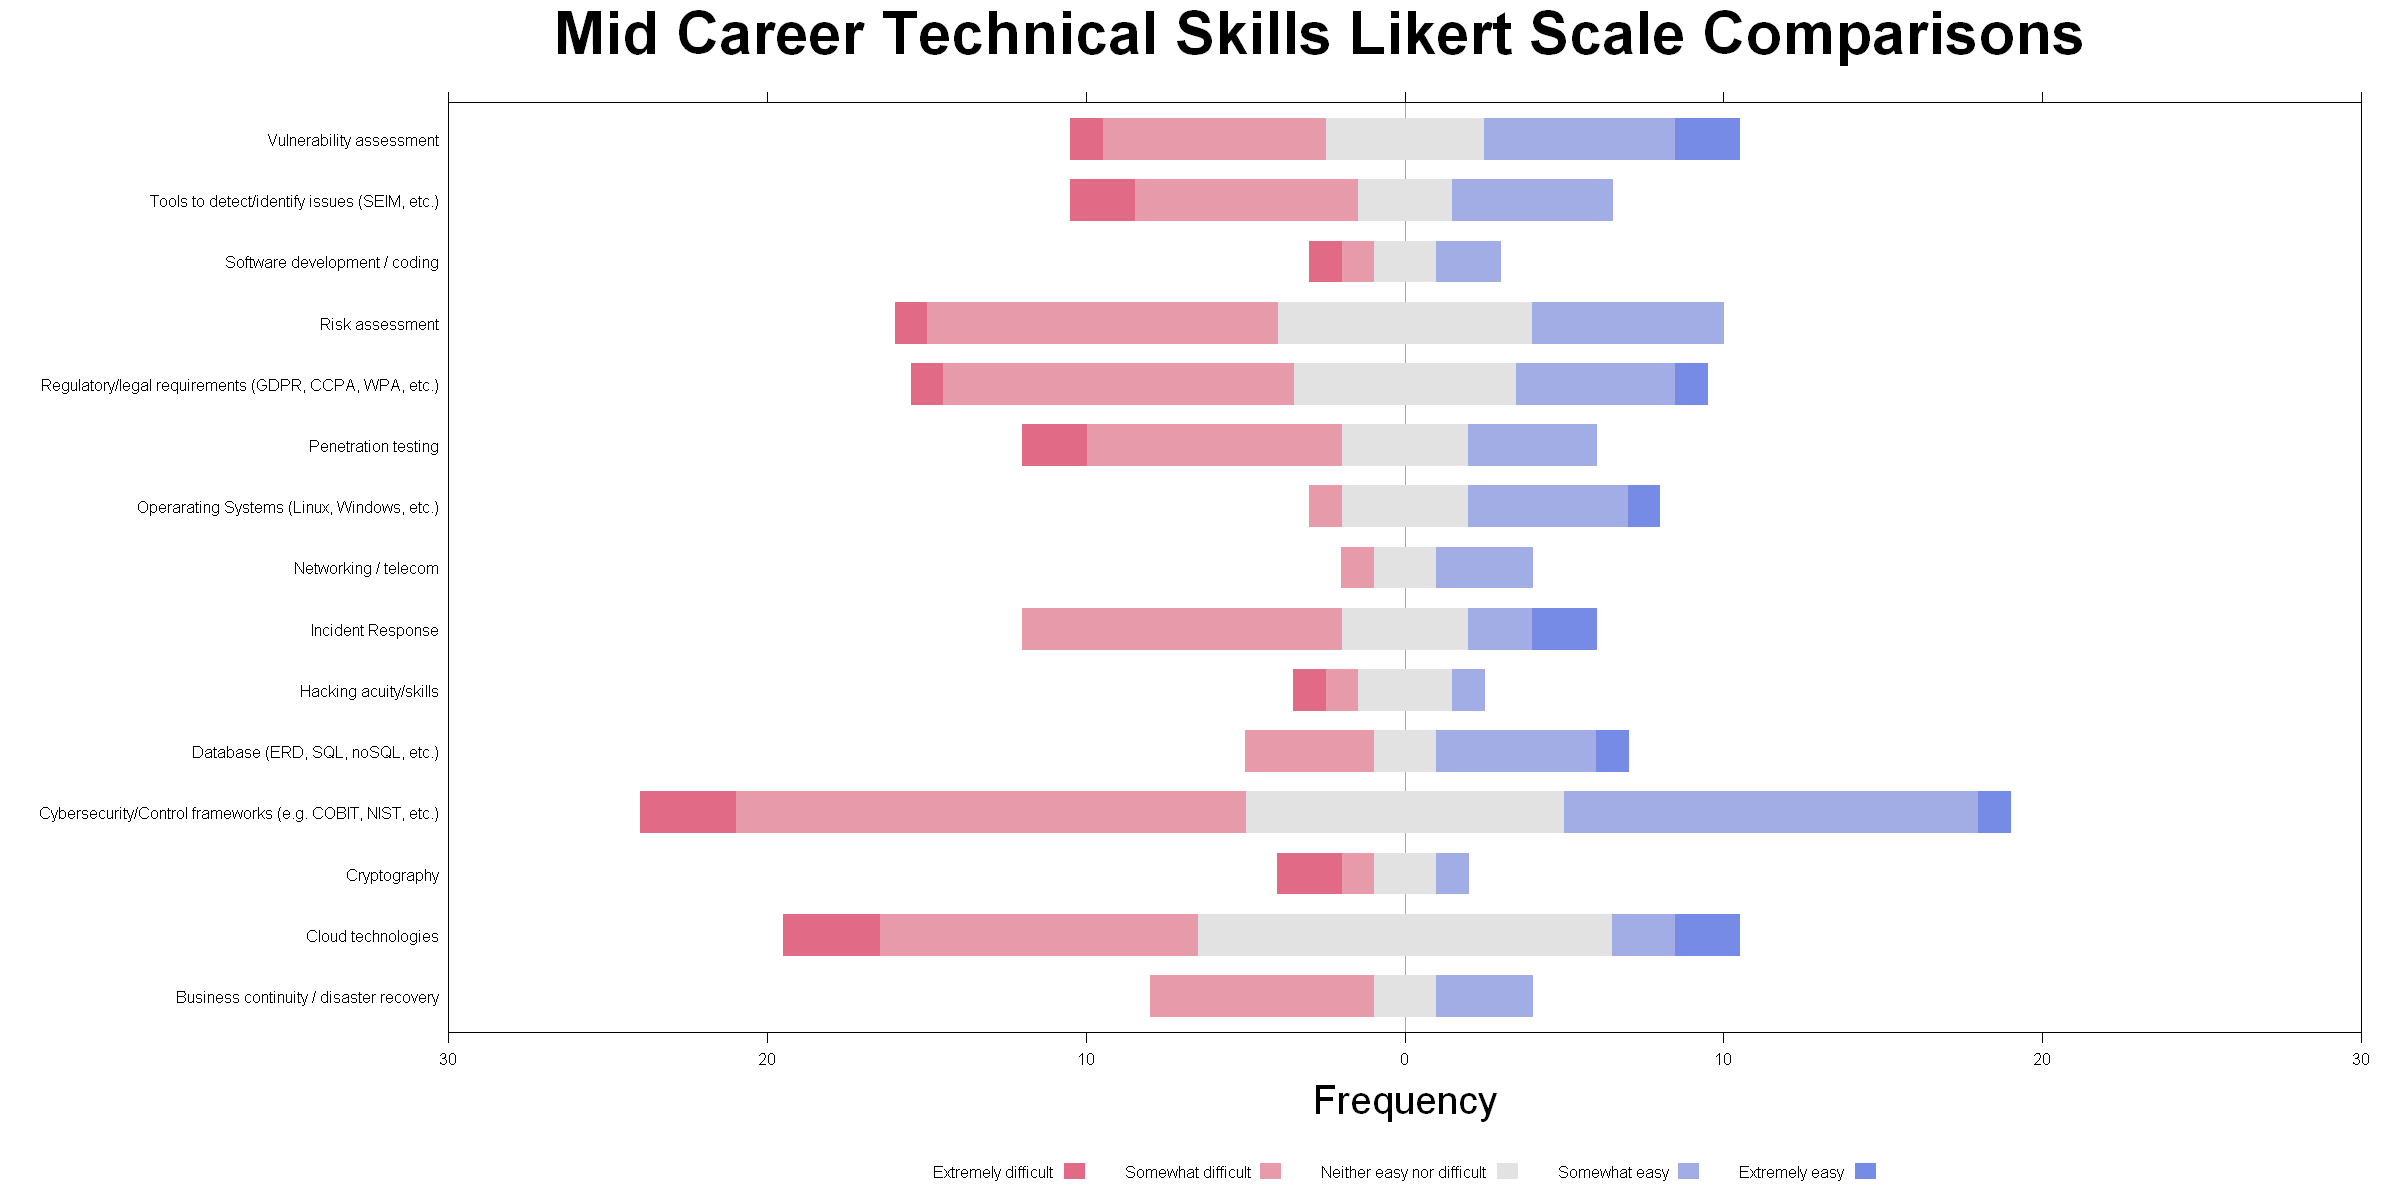

In [47]:
# From table created in R

P <-likert( Skills ~.,data=mctech, ylab=NULL,
       ReferenceZero=3, as.percent=FALSE,
       positive.order=FALSE, data.order=TRUE,
       main = list("Mid Career Technical Skills Likert Scale Comparisons",x=unit(.55, "npc"), cex = 3), 
       #sub= list("Test",x=unit(.55, "npc")), 
       xlab=list("Frequency", cex = 2),
       xlim=c(-30,30),
       strip=FALSE, 
       par.strip.text=list(cex=.7))
       options(repr.plot.width=20, repr.plot.height=10)

P

In [10]:
#create Mid Career Professional Likert DF from Text
mcpro <- select(datxt, Q27_1:Q27_14)
mcpro[c(1),] <- gsub(".*? - ", "", mcpro[c(1),]) #
names(mcpro) <- as.matrix(mcpro[1, ])
mcpro <- mcpro[-1, ]
mcpro <- mcpro[-c(1),]
#eltech <- sapply(eltech, as.numeric) #don't  need this because it's chr

#begin to pivot
mcpro <- gather(mcpro, skill,response, c(1:14))%>%
  filter(response != "")
mcpro$skill <- as.factor(mcpro$skill)
mcpro$response <- as.factor(mcpro$response)
mcpro <- table(mcpro$skill,mcpro$response) %>% as.data.frame.matrix()
mcpro <- select(mcpro, "Extremely difficult", "Somewhat difficult", "Neither easy nor difficult", "Somewhat easy", "Extremely easy")
mcpro <- tibble::rownames_to_column(mcpro, var="Skills") 

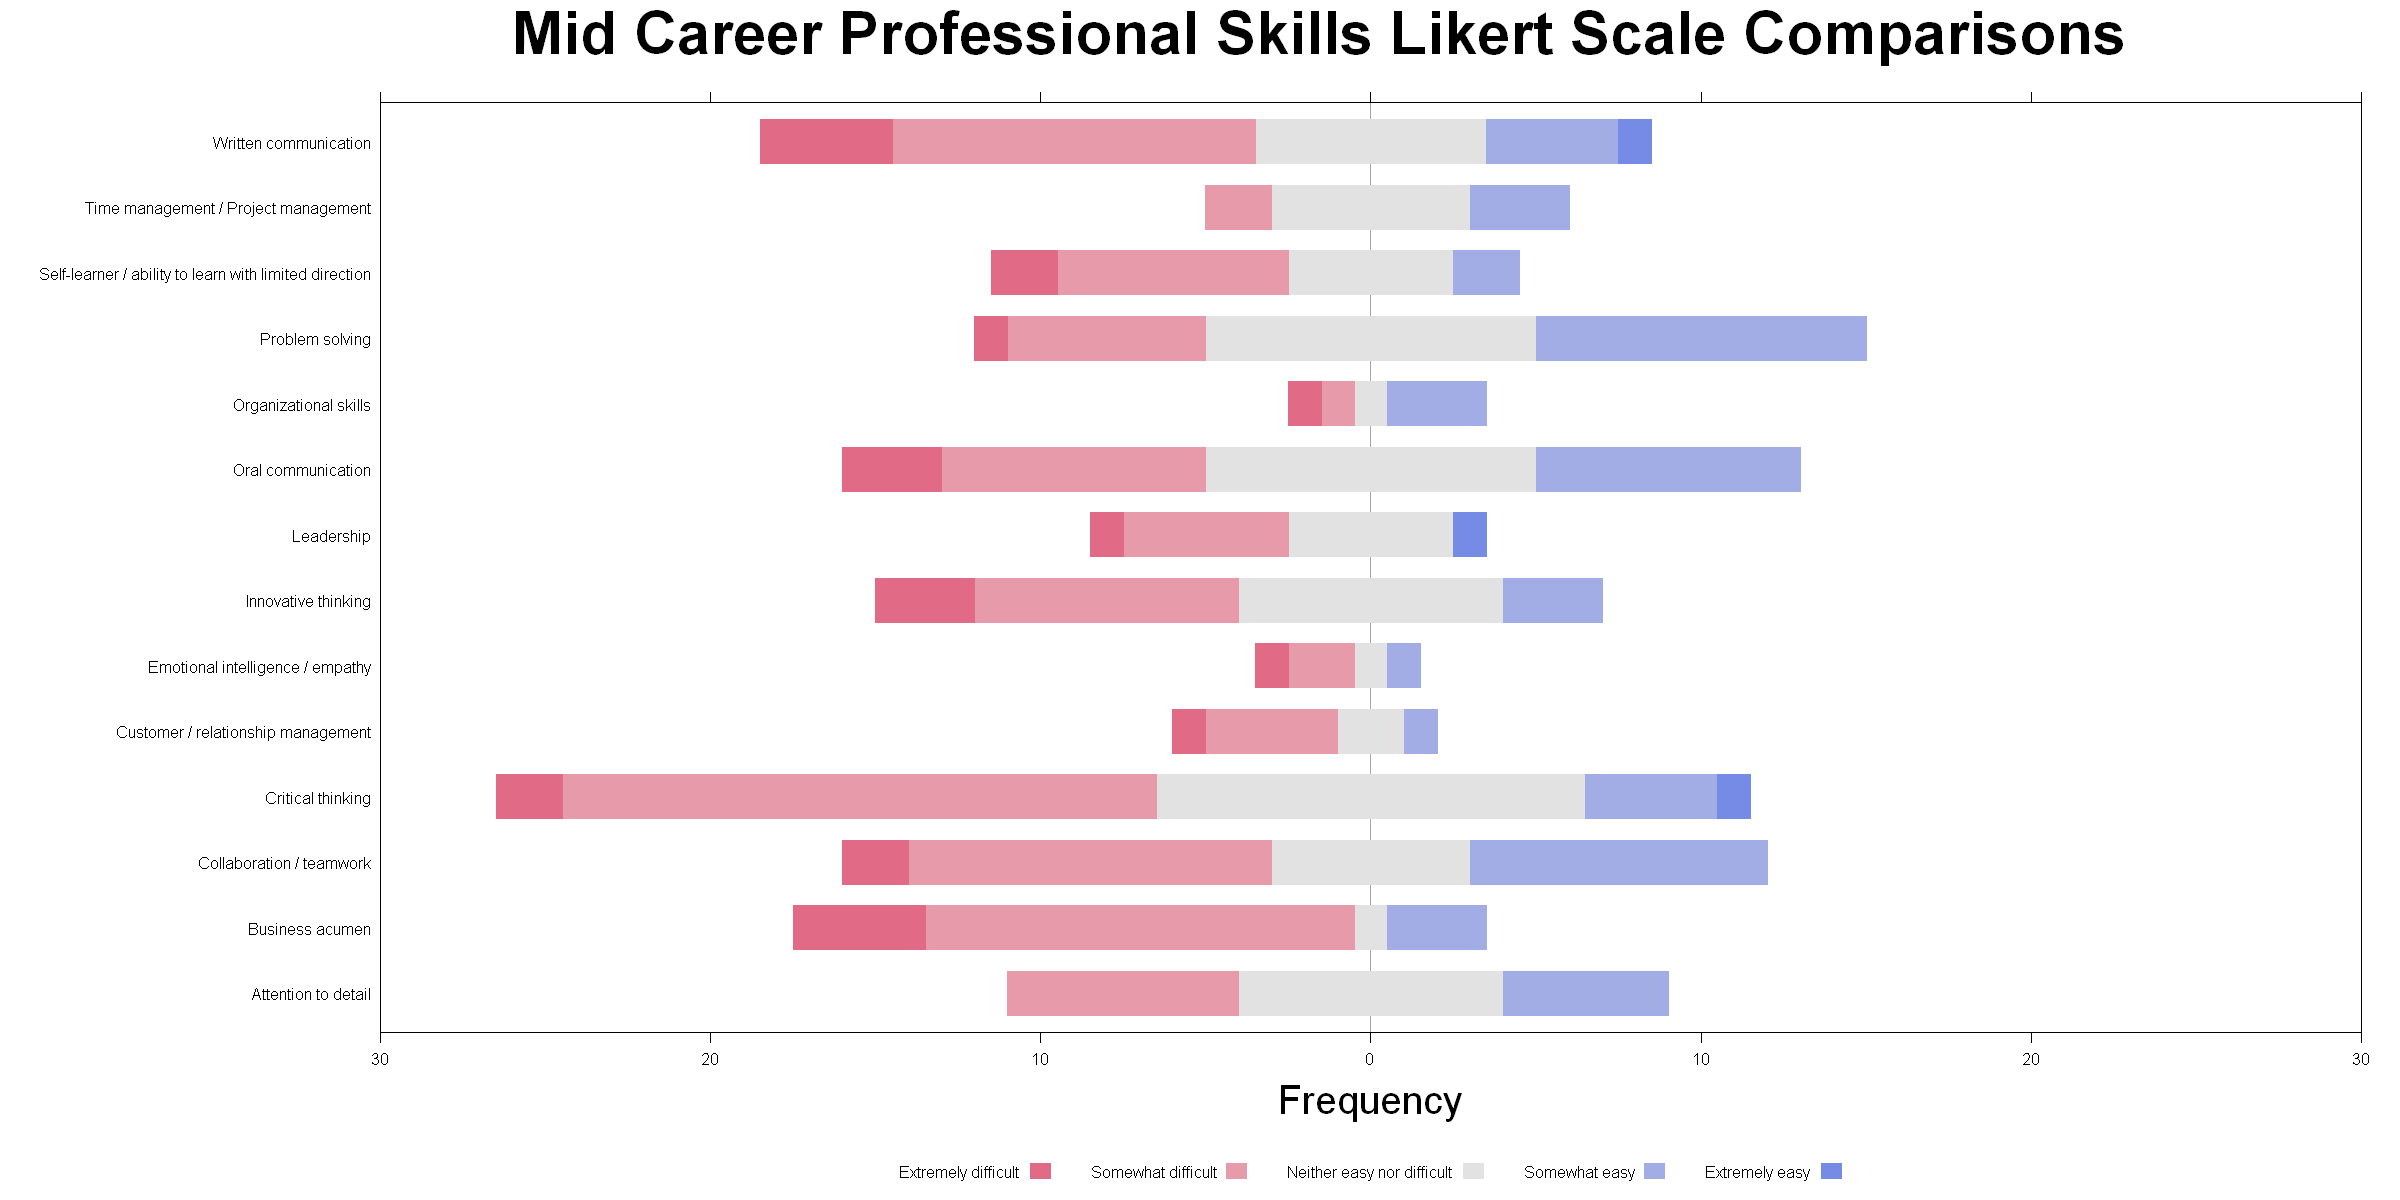

In [48]:
# From table created in R

P <-likert( Skills ~.,data=mcpro, ylab=NULL,
       ReferenceZero=3, as.percent=FALSE,
       positive.order=FALSE, data.order=TRUE,
       main = list("Mid Career Professional Skills Likert Scale Comparisons",x=unit(.55, "npc"), cex = 3), 
       #sub= list("Test",x=unit(.55, "npc")), 
       xlab=list("Frequency", cex = 2),
       xlim=c(-30,30),
       strip=FALSE, 
       par.strip.text=list(cex=.7))
       options(repr.plot.width=20, repr.plot.height=10)

P

# Dataframe Created in Excel

In [52]:
mcprofxl %>% head()

,Skill,Extremely.difficult,Somewhat.difficult,Neither.easy.nor.difficult,Somewhat.easy,Extremely.easy
,<chr>,<int>,<int>,<int>,<int>,<int>
1,Writing,4,11,7,4,1
2,Oral,4,7,4,4,0
3,Detail,2,5,4,0,1
4,ProbSolv,1,2,3,2,0
5,CritThink,2,7,6,2,1
6,Organized,0,0,1,1,0


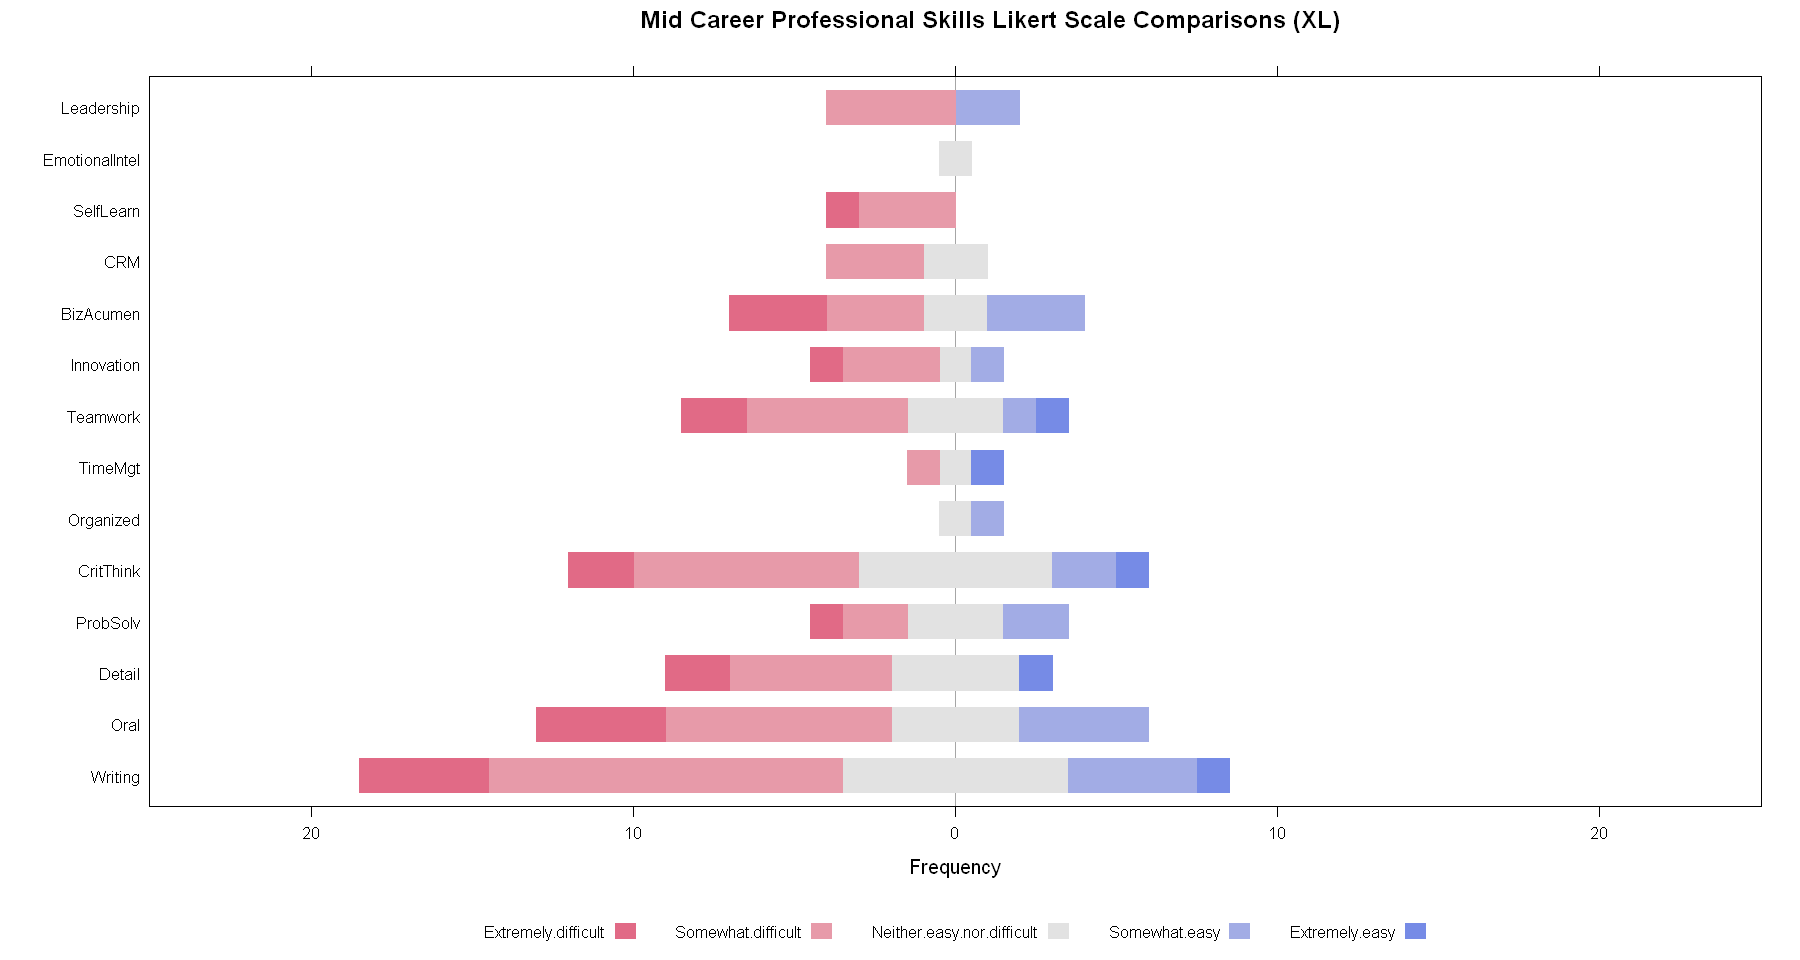

In [46]:
# From table created in Excel
# My manipulatiosns of HH likert - Mid Career Professional Frequency
P <-likert(Skill ~ ., data=mcprofxl, ylab=NULL,
       ReferenceZero=3, as.percent=FALSE,
       positive.order=FALSE, data.order=TRUE,
       main = list("Mid Career Professional Skills Likert Scale Comparisons (XL)",x=unit(.55, "npc")), 
       #sub= list("Test",x=unit(.55, "npc")), 
       xlab="Frequency",
       xlim=c(-25,25),
       strip=FALSE, 
       par.strip.text=list(cex=.7))
       options(repr.plot.width=15, repr.plot.height=8)
P     

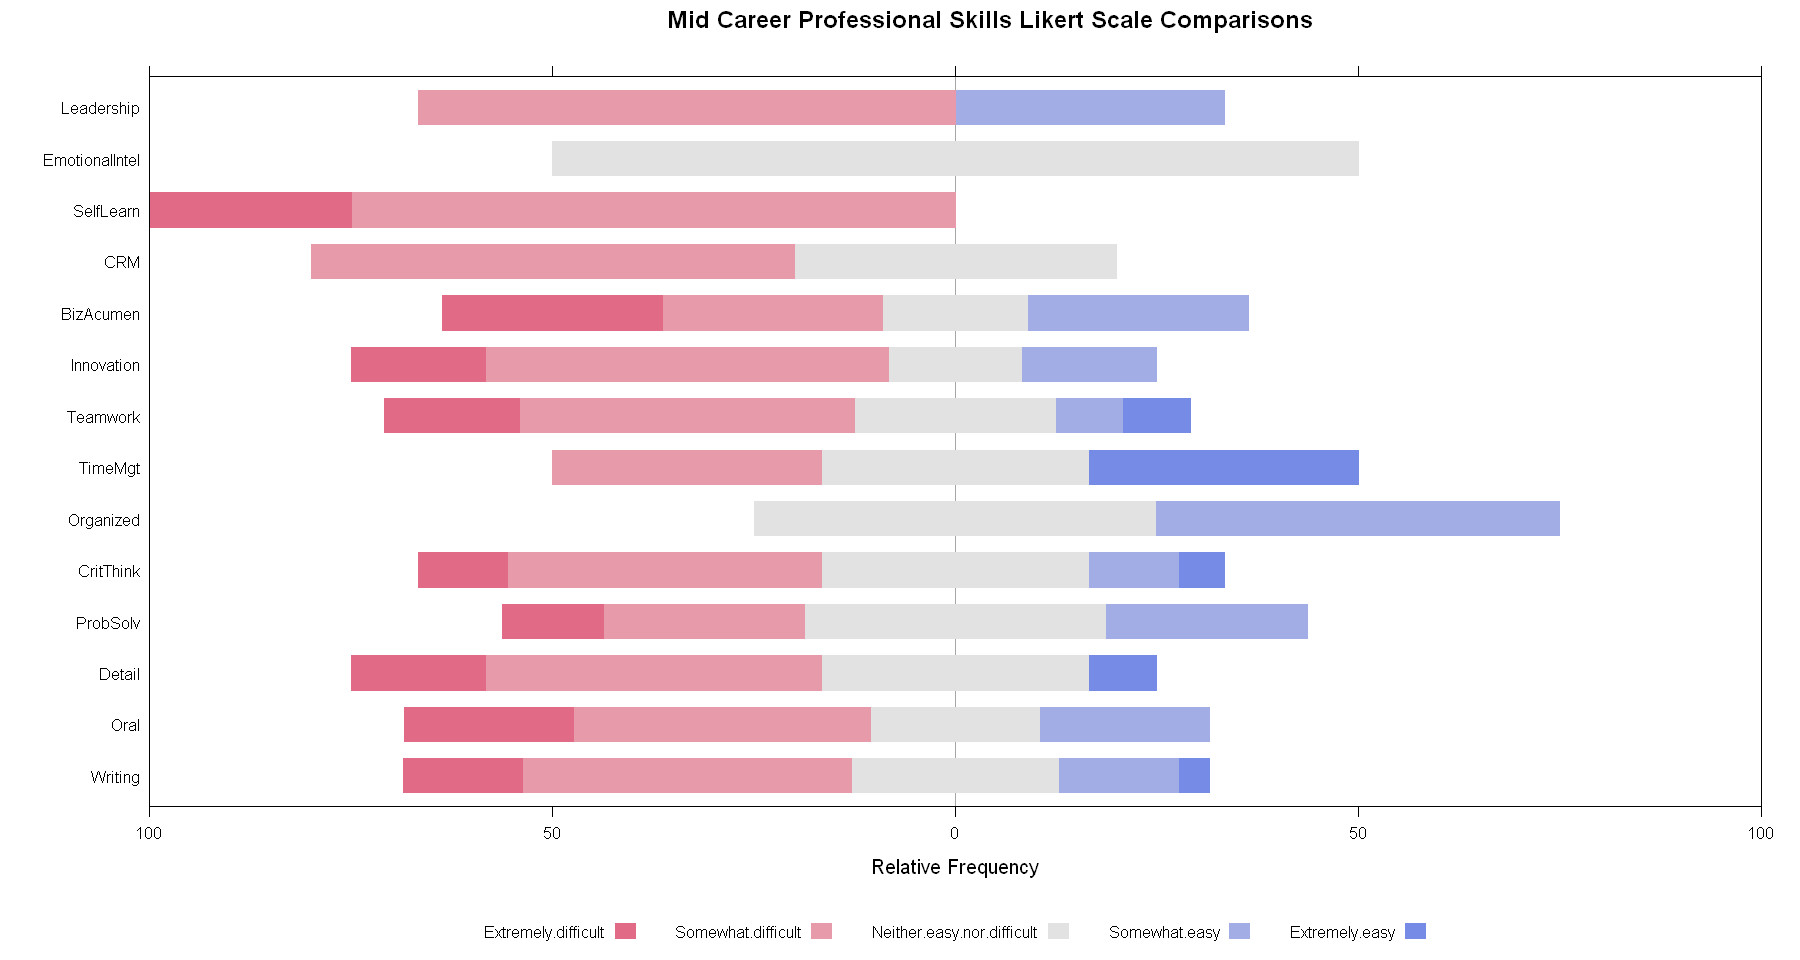

In [47]:
# My manipulations of HH likert Mid Career Professional Relative Frequency
likert(Skill ~ ., data=mcprofxl, ylab=NULL,
       ReferenceZero=3, as.percent="noRightAxis",
       positive.order=FALSE,  data.order=TRUE,
       main = list("Mid Career Professional Skills Likert Scale Comparisons",x=unit(.55, "npc")), 
       #sub= list("Difficulty Rating",x=unit(.57, "npc")),
       xlab="Relative Frequency",
       xlim=c(-100,100),
       strip=FALSE, 
       par.strip.text=list(cex=.7))
       options(repr.plot.width=15, repr.plot.height=10) 

# Original Code I began with

In [ ]:
# Original sample for HH likert
likert(Measure ~ ., data=Oct_df, ylab=NULL,
       ReferenceZero=3, as.percent=TRUE,
       positive.order=TRUE, 
       main = list("Monthly Meal Service Satisfaction Survey Report, Oct 2016",x=unit(.55, "npc")), 
       sub= list("Satisfaction Rating",x=unit(.57, "npc")), 
       xlim=c(-40,-20,0,20,40,60,80,100),
       strip=FALSE, 
       par.strip.text=list(cex=.7))